Реализуйте mapper для алгоритма расчета PageRank с помощью Hadoop Streaming. 

Входные и выходные данные: В качестве ключа идет номер вершины. Значение составное: через табуляцию записано значение PageRank (округленное до 3-го знака после запятой) и список смежных вершин (через "," в фигурных скобках).

Пример работы mapper приведен для графа из лекции (при этом номера вершин приведены без n):
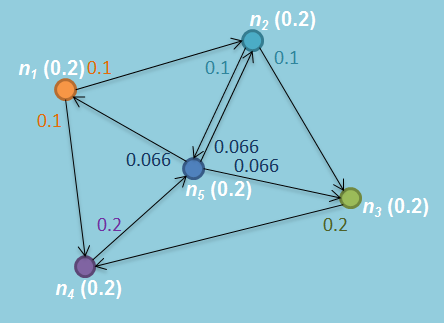
Sample Input:

    1	0.200	{2,4}
    2	0.200	{3,5}
    3	0.200	{4}
    4	0.200	{5}
    5	0.200	{1,2,3}
Sample Output:

    1	0.200	{2,4}
    2	0.100	{}
    4	0.100	{}
    2	0.200	{3,5}
    3	0.100	{}
    5	0.100	{}
    3	0.200	{4}
    4	0.200	{}
    4	0.200	{5}
    5	0.200	{}
    5	0.200	{1,2,3}
    1	0.067	{}
    2	0.067	{}
    3	0.067	{}

In [21]:
with open('data/data20.txt') as f:
    
    for line in f:
        node, str_pr, str_neighbour_nodes = line.strip().split()
        print(f'{node}\t{str_pr}\t{str_neighbour_nodes}')
        
        neighbour_nodes = str_neighbour_nodes.strip('{}').split(',')
        new_pr = float(str_pr)/len(neighbour_nodes)
        
        for neighbour_node in neighbour_nodes:
            print('{neighbour_node}\t{new_pr:.3f}\t{{}}'.format(neighbour_node=neighbour_node,
                                                                new_pr=new_pr))

1	0.200	{2,4}
2	0.100	{}
4	0.100	{}
2	0.200	{3,5}
3	0.100	{}
5	0.100	{}
3	0.200	{4}
4	0.200	{}
4	0.200	{5}
5	0.200	{}
5	0.200	{1,2,3}
1	0.067	{}
2	0.067	{}
3	0.067	{}


---

Реализуйте reducer для алгоритма расчета PageRank с помощью Hadoop Streaming. Используйте упрощенный алгоритм (без случайных переходов).

Входные и выходные данные: В качестве ключа идет номер вершины. Значение составное: через табуляцию записано значение PageRank (округленное до 3-го знака после запятой) и список смежных вершин (через "," в фигурных скобках).

Пример работы reducer приведен для графа из лекции (при этом номера вершин приведены без n):
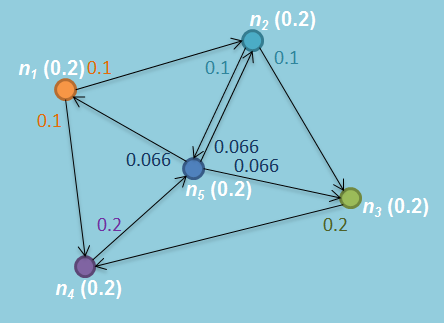
Sample Input:

    1	0.067	{}
    1	0.200	{2,4}
    2	0.067	{}
    2	0.100	{}
    2	0.200	{3,5}
    3	0.067	{}
    3	0.100	{}
    3	0.200	{4}
    4	0.100	{}
    4	0.200	{}
    4	0.200	{5}
    5	0.100	{}
    5	0.200	{}
    5	0.200	{1,2,3}
Sample Output:

    1	0.067	{2,4}
    2	0.167	{3,5}
    3	0.167	{4}
    4	0.300	{5}
    5	0.300	{1,2,3}

In [9]:
with open('data/data21.txt') as f:
    
    last_node, last_sum_pr, last_str_neighbour_nodes = None, 0.0, {}
    
    for line in f:
        node, str_pr, str_neighbour_nodes = line.strip().split()
                
        if last_node and node != last_node:
            print(f'{last_node}\t{last_sum_pr:.3f}\t{last_str_neighbour_nodes}')
            last_sum_pr = 0.0
        
        last_node = node
        if len(str_neighbour_nodes) > 2:
            last_str_neighbour_nodes = str_neighbour_nodes
        else:
            last_sum_pr += float(str_pr)
        
        
    if last_node:
        print(f'{last_node}\t{last_sum_pr:.3f}\t{last_str_neighbour_nodes}')

1	0.067	{2,4}
2	0.167	{3,5}
3	0.167	{4}
4	0.300	{5}
5	0.300	{1,2,3}


---

Модифицируйте reducer из предыдущего задания так, чтобы он расcчитывал PageRank с учетом случайного перехода, т.е. первого члена в формуле:
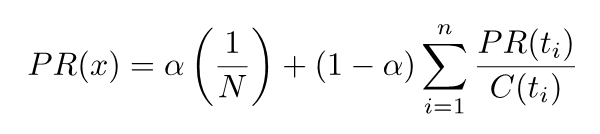
Для всех тестов считайте, что N = 5,  α = 0,1.
Входные и выходные данные: В качестве ключа идет номер вершины. Значение составное: через табуляцию записано значение PageRank (округленное до 3-го знака после запятой) и список смежных вершин (через "," в фигурных скобках).

Пример работы reducer приведен для графа из лекции (при этом номера вершин приведены без n):
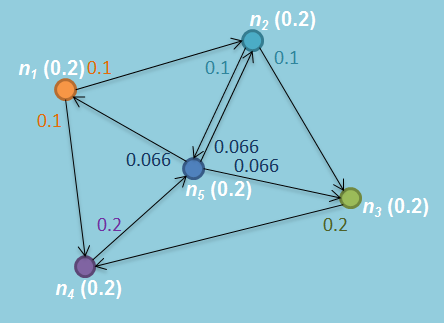
Sample Input:

    1	0.067	{}
    1	0.200	{2,4}
    2	0.067	{}
    2	0.100	{}
    2	0.200	{3,5}
    3	0.067	{}
    3	0.100	{}
    3	0.200	{4}
    4	0.100	{}
    4	0.200	{}
    4	0.200	{5}
    5	0.100	{}
    5	0.200	{}
    5	0.200	{1,2,3}
Sample Output:

    1	0.080	{2,4}
    2	0.170	{3,5}
    3	0.170	{4}
    4	0.290	{5}
    5	0.290	{1,2,3}

In [11]:
with open('data/data21.txt') as f:
    
    N = 5
    alpha = 0.1
    
    last_node, last_sum_pr, last_str_neighbour_nodes = None, 0.0, {}
    
    for line in f:
        node, str_pr, str_neighbour_nodes = line.strip().split()
                
        if last_node and node != last_node:
            print(f'{last_node}\t{alpha*(1/N)+(1-alpha)*last_sum_pr:.3f}\t{last_str_neighbour_nodes}')
            last_sum_pr = 0.0
        
        last_node = node
        if len(str_neighbour_nodes) > 2:
            last_str_neighbour_nodes = str_neighbour_nodes
        else:
            last_sum_pr += float(str_pr)
        
        
    if last_node:
        print(f'{last_node}\t{alpha*(1/N)+(1-alpha)*last_sum_pr:.3f}\t{last_str_neighbour_nodes}')

1	0.080	{2,4}
2	0.170	{3,5}
3	0.170	{4}
4	0.290	{5}
5	0.290	{1,2,3}
